# Session 1: Tuesday, July 15, 2:00 pm - 3:30 pm (1h30)

1.   Introduction to tensor
   * Tensor creation and manipulation
   * Run calculations on CPU/GPU
2.   Basics of Neural Network
   * Basics for creating a model (Class nn.Module, init and forward function)
   * Basics for train and test (how to set up loss function and optimizer,  turn model in inference mode for testing)
3.   Create an Artificial Neural Network

### Part 1: Introduction to tensors

Let's start by importing PyTorch and checking the version we're using.

In [3]:
import torch

print("PyTorch version:", torch.__version__)

PyTorch version: 2.6.0+cu124


## A] What is a tensor?

PyTorch only manipulates data in Tensor format, so we need to create our data directly in this format, or convert it if it's in numpy array or dataframe format, for example.

PyTorch Tensor data can be scalar, vector , matrix or tensor.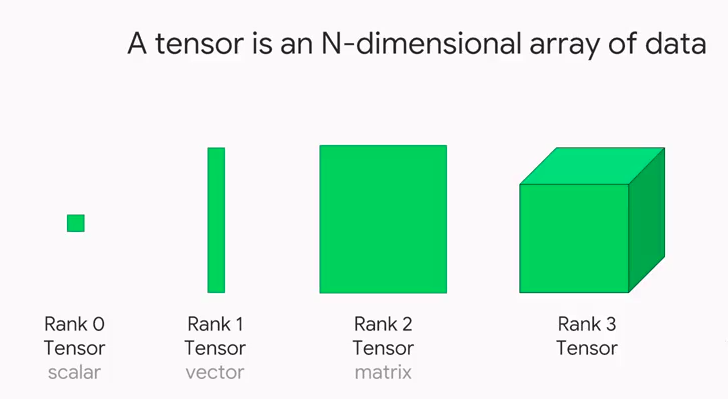

In [4]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [5]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [6]:
# Matrix
Matrix = torch.tensor([[7, 8],
                       [9, 10]])
Matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [7]:
# Tensor
Tensor = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
Tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

To know the size and dimension of Tensor variables, you can use `shape` and `ndim` functions.


In [8]:
# Dimension
print("scalar dim :", scalar.ndim)
print("vector dim :", vector.ndim)
print("Matrix dim :", Matrix.ndim)
print("Tensor dim :", Tensor.ndim)

# Size
print("scalar size :", scalar.shape)
print("vector size :", vector.shape)
print("Matrix size :", Matrix.shape)
print("Tensor size :", Tensor.shape)

scalar dim : 0
vector dim : 1
Matrix dim : 2
Tensor dim : 3
scalar size : torch.Size([])
vector size : torch.Size([2])
Matrix size : torch.Size([2, 2])
Tensor size : torch.Size([1, 3, 3])


For scalars, this is a single value, so the Tensor format considers it to be a dimensionless and sizeless tensor (in the "mathematical" sense).

The size function returns the size of each dimension


*   For matrices, first the height, then the width
*   For tensors, first the depth (in the case of an image, the number of channels), then the height, then the width.)

## B] Tensor datatypes

There are many different tensor datatypes available in PyTorch : https://docs.pytorch.org/docs/stable/tensors.html#data-types

The most common type (and generally the default) is `torch.float32` or `torch.float`. This is referred to as "32-bit floating point".

You can also have `torch.int32`, i.e. arrays of integers, and `torch.bool`, i.e. Booleans.

64-bit formats such as `torch.int64` and `torch.float64` are also very common.

In [9]:
Matrix.dtype

torch.int64

In [10]:
float_64_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float64)

float_64_tensor.dtype

torch.float64

In [11]:
boolean = torch.tensor([True, False, True])
boolean.dtype

torch.bool

## C] Manipulating tensors

### a) Create random tensors or tensors filled with 0 or 1

In [12]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor

tensor([[0.5515, 0.6868, 0.9938, 0.1815],
        [0.5734, 0.2267, 0.7070, 0.7398],
        [0.0563, 0.5984, 0.7717, 0.9798]])

In [13]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor

tensor([[[0.7673, 0.7034, 0.1219],
         [0.5996, 0.1584, 0.0540],
         [0.1664, 0.3197, 0.1266],
         ...,
         [0.5189, 0.6761, 0.5681],
         [0.2902, 0.5128, 0.3569],
         [0.6836, 0.7783, 0.9027]],

        [[0.7627, 0.3787, 0.8516],
         [0.4000, 0.6501, 0.3255],
         [0.5548, 0.4357, 0.6454],
         ...,
         [0.6951, 0.1453, 0.8965],
         [0.6478, 0.2283, 0.1250],
         [0.2496, 0.6471, 0.1008]],

        [[0.8680, 0.4686, 0.3723],
         [0.1823, 0.5398, 0.1771],
         [0.0406, 0.6652, 0.0331],
         ...,
         [0.9279, 0.6649, 0.0135],
         [0.9552, 0.8820, 0.5294],
         [0.2843, 0.4249, 0.5549]],

        ...,

        [[0.1919, 0.9228, 0.6864],
         [0.9842, 0.9934, 0.7857],
         [0.7150, 0.9424, 0.6541],
         ...,
         [0.8876, 0.1254, 0.8863],
         [0.2403, 0.0762, 0.2046],
         [0.0786, 0.3563, 0.4438]],

        [[0.9844, 0.6753, 0.1278],
         [0.3939, 0.9151, 0.3608],
         [0.

In [14]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [15]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### b) Creating a range and tensors like

You might want a range of numbers, such as 1 to 10 or 0 to 100.

You can use `torch.arange(start, end, step)` to do this.

In [16]:
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### c) Basic operations

In [18]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [19]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

In [20]:
# /!\ Be careful: Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

In [21]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [22]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

In [23]:
# Divide and reassign
tensor = tensor / 10
tensor

tensor([0.1000, 0.2000, 0.3000])

In [24]:
# Can also use torch functions
print("Initial tensor:", tensor)
print("Tensor x 10 with multiply:", torch.multiply(tensor, 10))
print("Tensor x 10 with mul:", torch.mul(tensor, 10)) # torch.mul is a shortcut for multiply
print("Tensor + 10:", torch.add(tensor, 10))
print("Tensor / 10:", torch.div(tensor, 10))

# However, it's more common to use the operator symbols like * instead of torch.mul()
print(tensor * tensor)

Initial tensor: tensor([0.1000, 0.2000, 0.3000])
Tensor x 10 with multiply: tensor([1., 2., 3.])
Tensor x 10 with mul: tensor([1., 2., 3.])
Tensor + 10: tensor([10.1000, 10.2000, 10.3000])
Tensor / 10: tensor([0.0100, 0.0200, 0.0300])
tensor([0.0100, 0.0400, 0.0900])


PyTorch implements matrix multiplication functionality in the `torch.matmul()` method.


Or you can use the operator symbols `@`, but the in-built `torch.matmul()` method is faster

In [25]:
print(torch.matmul(tensor, tensor))
print(tensor @ tensor)

tensor(0.1400)
tensor(0.1400)


### d) Finding the min, max, mean, sum of a tnesor

In [26]:
# Create a tensor in FLOAT32 type
x = torch.arange(0, 100, 10, dtype=torch.float32)
x

tensor([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [27]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
print(f"Mean: {x.mean()}") #  won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0.0
Maximum: 90.0
Mean: 45.0
Sum: 450.0


/!\ `torch.mean()` require tensors to be in `torch.float32`.

You can also do the same operations with torch methods.

In [28]:
torch.min(x), torch.max(x), torch.mean(x), torch.sum(x)

(tensor(0.), tensor(90.), tensor(45.), tensor(450.))


### e) Indexing (selecting data from tensors)

In [29]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

`reshape` is used here to transform my 10-element vector into a 3-dimensional tensor.

In [30]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [31]:
# You can also use : to specify "all values in this dimension" and then use a comma (,) to add another dimension.

# Get all values of 0th dimension and the 0 index of 1st dimension
print(x[:, 0])

# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
print(x[:, :, 1])

# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
print(x[:, 1, 1])

# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
print(x[0, 0, :]) # same as x[0][0]

tensor([[1, 2, 3]])
tensor([[2, 5, 8]])
tensor([5])
tensor([1, 2, 3])


Finally, you can use indexes to replace part of a vector.

In [32]:
x = torch.arange(0, 10, 1)
print("x:", x)
x[4:7] = 2
print("x:", x)

x: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x: tensor([0, 1, 2, 3, 2, 2, 2, 7, 8, 9])


### Exercice:
You measure the altitude of a surface by taking a point every meter along a 20 m profile.
Create a `distance` variable which will contain the distances along this profile by using `torch.arange`.
Create an `altitude` variable, with an altitude of 0 m for the first 10 metres, an altitude of 5 m for the last 5 metres, and a slope in between. Finally, add noise to altitude using `rand`, trying to add only between 0 and 0.1 m of noise (Remember `rand` create random value between 0 and 1).
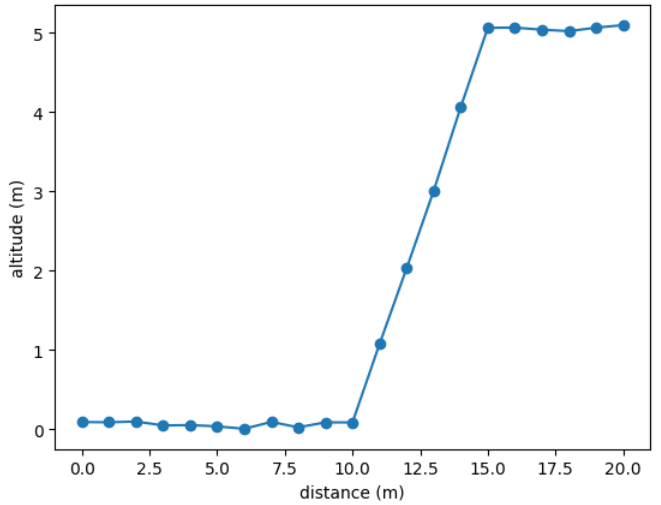


In [39]:
# Write your code here

distance = torch.arange(start = 0, end = 21, step=1)
zeros = torch.zeros(10)
slope = torch.arange(1,6,1)
fives = torch.ones(1) * 5

fives

altitude = distance[0:10:1]
altitude[10:16] = torch.arange(1,6,-1)
altitude[16:21] = torch.ones(1) * 5

altitude

 # do it in several step: create the seperately non-zero parts and integrate them afterwards


RuntimeError: upper bound and larger bound inconsistent with step sign

In [34]:
# Solution


You have the function to display the results below.

In [35]:
import matplotlib.pyplot as plt
plt.plot(distance, altitude)
plt.scatter(distance, altitude)
plt.xlabel('distance (m)')
plt.ylabel('altitude (m)')

NameError: name 'altitude' is not defined

### f) PyTorch tensors & NumPy

Since NumPy is a popular Python numerical computing library, PyTorch has functionality to interact with it nicely.

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:

*   `torch.from_numpy(ndarray)` - NumPy array -> PyTorch tensor.
*   `torch.Tensor.numpy()` - PyTorch tensor -> NumPy array.


In [ ]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

## C] Running tensors on GPUs
By default these operations are often done on a CPU, if you have a GPU, it will enable you to perform calculations faster.

To do this, the variables must be stored on the GPU.

In [ ]:
# Check if a variables are on GPU or CPU
tensor.device

In [ ]:
# Check for GPU
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

In order to activate CUDA, go to "Runtime" and in "Change Runtime type" select "GPU"

In [ ]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu, tensor_on_gpu.device

### Moving tensors back to the CPU
For example, you'll want to do this if you want to interact with your tensors with NumPy (NumPy does not leverage the GPU).

In [ ]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
tensor_on_gpu.numpy()

Instead, to get a tensor back to CPU and usable with NumPy we can use Tensor`.cpu()`.

This copies the tensor to CPU memory so it's usable with CPUs.

In [ ]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

# Part 2: Basics of neural networks

A neuron is a function that satisfies this equation:

y = weight * X + bias

* x corresponds to input data
* y to prediction
* weight and bias are the parameters to be learned by the model

## A] Linear regression by hand

In [40]:
import torch
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Python is a modular language, meaning that everything is created in module form (i.e. a block of code that can be reused). To define a module that can be recalled later, we use the `Class` method.

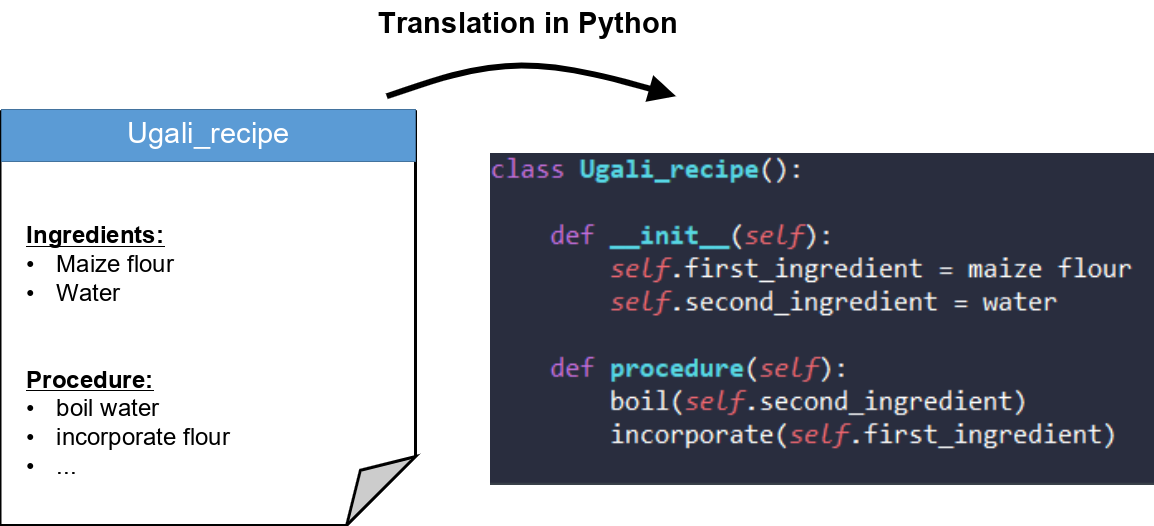

Python packages (including PyTorch) are already created as modules (`Class`) and can be reused by modifying them to suit our needs.

Let's take the example of linear regression.

In [41]:
from torch import nn # nn contains all of PyTorch's building blocks for neural networks

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)

    # Initialise model parameters to be used in various computations
    def __init__(self):
        super().__init__() # Means that we use what is already defined in nn.module

        self.weights = nn.Parameter(torch.randn(1, # start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float),
                                   requires_grad=True) # means PyTorch willtrack the gradients of this specific parameter for use with torch.autograd and gradient descent

        self.bias = nn.Parameter(torch.randn(1, # start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float),
                                requires_grad=True)


    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [42]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [43]:
# We can also get the state (what the model contains) of the model
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## B] Making predictions using torch.inference_mode()

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined in this method.

`torch.inference_mode()` turns off things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the `forward()` method) faster.

First, let's divide the data into the train and test categories.

In [44]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [45]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


PyTorch contains a function that already implements linear regression, so you can redefine our model like this:

In [46]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model_0 = LinearRegressionModel()
print(model_0)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


## C] Train model
To improve results, you need to train the model, i.e. update the parameters. To do this, we'll need to add a few more things to our recipe.

And that's a loss function as well as an optimizer

* Loss functions : Measures how wrong your model's predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.
* OPtimizers : Tells your model how to update its internal parameters to best lower the loss.

In [47]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
# params = parameters of target model to optimize
# lr = learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

For training we need to implement the backpropagation, here an example on one simple tensor

In [48]:
# Autograd example
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3 * x + 4

# Compute gradients i.e. backpropagation
y.backward()

print("dy/dx:", x.grad)  # Should be 2x + 3 => 2*2 + 3 = 7

dy/dx: tensor(7.)


Now it's time to creating 2 optimization loop :

* The training loop involves the model going through the training data and learning the relationships between the features and labels.
* The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never sees the testing data during training).

In [49]:
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.4566597044467926 | MAE Test Loss: 0.902740478515625 
Epoch: 10 | MAE Train Loss: 0.3415392339229584 | MAE Test Loss: 0.7685304880142212 
Epoch: 20 | MAE Train Loss: 0.2548103630542755 | MAE Test Loss: 0.6518100500106812 
Epoch: 30 | MAE Train Loss: 0.20335504412651062 | MAE Test Loss: 0.5596543550491333 
Epoch: 40 | MAE Train Loss: 0.17333532869815826 | MAE Test Loss: 0.48786434531211853 
Epoch: 50 | MAE Train Loss: 0.15608887374401093 | MAE Test Loss: 0.4337606430053711 
Epoch: 60 | MAE Train Loss: 0.14575017988681793 | MAE Test Loss: 0.3929426670074463 
Epoch: 70 | MAE Train Loss: 0.13897857069969177 | MAE Test Loss: 0.3625188171863556 
Epoch: 80 | MAE Train Loss: 0.13399270176887512 | MAE Test Loss: 0.33869674801826477 
Epoch: 90 | MAE Train Loss: 0.12999269366264343 | MAE Test Loss: 0.320896714925766 


## D] Saving and loading a PyTorch model
For saving and loading models in PyTorch, there are three main methods you should be aware of :

* `torch.save` -->	Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
* `torch.load` -->	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
* `torch.nn.Module.load_state_dict` -->	Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

In [ ]:
# SAVE
MODEL_SAVE_PATH = "torch_save.pth"
torch.save(obj=model_0.state_dict(), # only saving the state_dict() i.e. only saves the models learned parameters
           f=MODEL_SAVE_PATH)

In [ ]:
# LOAD
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

In [ ]:
model_0.state_dict()

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
test_pred == loaded_model_preds

# Part 3: create a Artificial Neural Network

A linear regression is a model with one neuron. So we can use `nn.Linear`for create a neural layer compose of several neurons.

In [ ]:
# 1 neuron
neuron = nn.Linear(1, 1) # 1 input and 1 output

# layer of 32 neurons
layer = nn.Linear(1, 32) # 1 input and 32 output

neuron, layer

In [ ]:
X = torch.tensor([[15]], dtype=torch.float32)

print("neuron output:", neuron(X))
print("layer output:", layer(X))

Last important element of ANN : incorporate non-linearity with activation function. Here we will use ReLU fonction



In [ ]:
relu = nn.ReLU()
output_layer = layer(X)
print("relu output:", relu(output_layer))

Now with this 2 élèments create an ANN model for regression task (so the final output will be 1 value) with:


*   one hidden layer of 64 neurons
*   one hidden layer of 32 neurons
*   one output layer of 1 neurons

Input data are of the form (100, 1), thus the number of input feature for the first layer is 1. Don't forget to add ReLU functions after hidden layers.

In [ ]:
# Write your code here

# Input data
X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y = x**2 + 3 * x + 4
print("X shape:", X.shape)

# Define model
class ANN(...):

# Instantiate model :
model = ANN(...)

# Predictions

In [51]:
# Solution
class ANN(nn.Module):
  def __init__(self, input_size):
    super(ANN, self).__init__()
    self.linear_1 = nn.Linear(input_size, 64)
    self.relu = nn.ReLU()
    self.linear_2 = nn.Linear(64, 32)
    self.relu_2 = nn.ReLU()
    self.linear_3 = nn.Linear(32, 1) # output =1 for regression


  def feed_forward(self,x):
    x = self.linear_1(x)
    x = self.relu(x)
    x = self.linear_2(x)


model_wueeh = ANN(1)
model_wueeh

ANN(
  (linear_1): Linear(in_features=1, out_features=64, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=64, out_features=32, bias=True)
)

Now train and test your model

In [ ]:
# Write your code here

In [ ]:
# Solution

# Bonus (if we have time) : Classification of hand-written digits
Digits datasets consists of 8x8 pixel images of digits between 0 and 9.
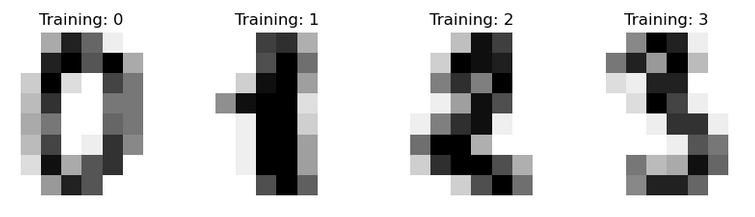

In [ ]:
from sklearn.datasets import load_digits

# Load Digits dataset
digits = load_digits()
X, y = digits.data, digits.target  # X shape: [n_samples, 64], y: [n_samples]

In [ ]:
# Preprocess data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Adapt the model we created earlier `New_ANN` to our new dataset.

In [ ]:
class DigitANN(nn.Module):
    # Write your code here

Train the `DigitANN` model over 50 epoch and evaluate its performance with `accuracy_score`. Take some time to think about which loss function to use (you can look it up on the Internet). Choose `Adam` as optimizer instead of `SGD` (you can also compare the performance differences between the two).

In [ ]:
from sklearn.metrics import accuracy_score

""" Some help:
acc = accuracy_score(y_true, y_pred)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    or
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
"""
# Write your code here


In [ ]:
# Solution